In [2]:
# Feb 18 2019
# Shaojun Yu
# Python 3.7

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
import pandas

In [41]:
training = pandas.read_csv('HW_1_training.txt', sep='\t')
C1 = training[training['Y'] == 0]
C2 = training[training['Y'] == 1]

### Class 1 mean & cov

In [5]:
C1[['X1','X2']].mean()

X1    1.571080
X2   -0.610748
dtype: float64

In [6]:
C1[['X1','X2']].cov()

,X1,X2
X1,4.061016,-0.895005
X2,-0.895005,0.782738


### Class 2 mean & cov

In [7]:
C2[['X1','X2']].mean()

X1    2.311807
X2    1.149233
dtype: float64

In [8]:
C2[['X1','X2']].cov()

,X1,X2
X1,0.976093,0.418021
X2,0.418021,1.387310


In [9]:
c1 = multivariate_normal(C1[['X1','X2']].mean(), C1[['X1','X2']].cov())
c2 = multivariate_normal(C2[['X1','X2']].mean(), C2[['X1','X2']].cov())

In [10]:
#prior probability
p1 = len(C1) / len(training)
p2 = len(C2) / len(training)

(0, 0.15)

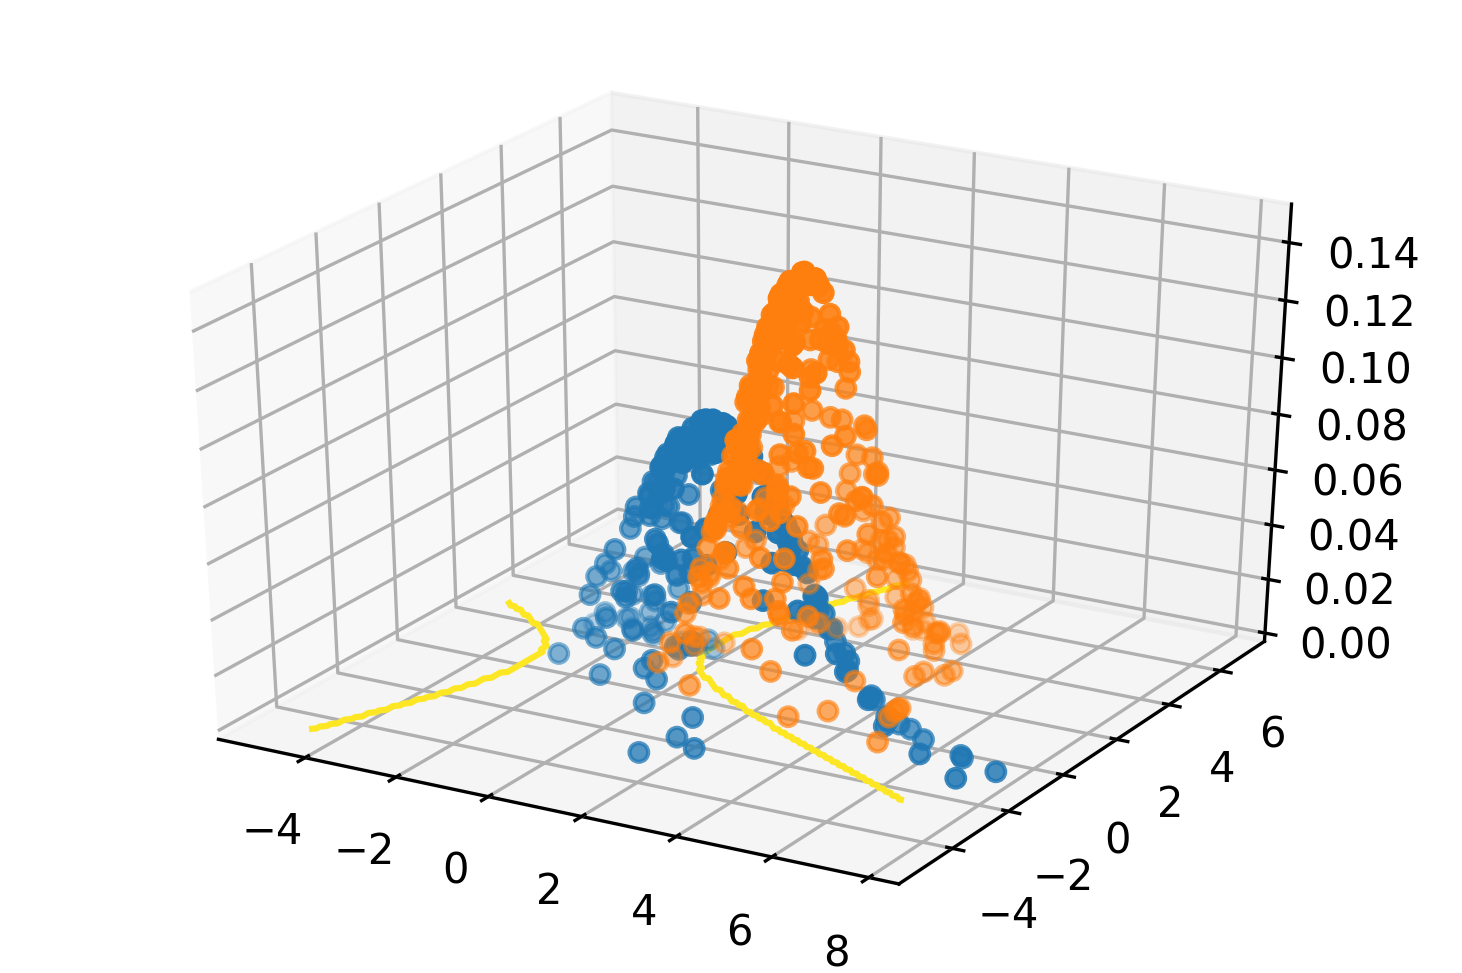

In [40]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')

Z1 = [c1.pdf([C1['X1'][i],C1['X2'][i]]) for i in range(len(C1))]
Z2 = [c2.pdf([C2['X1'][i],C2['X2'][i]]) for i in range(len(C1),len(C1)+len(C2))]

# ys = randrange(n, 0, 100)
# zs = randrange(n, zlow, zhigh)
ax.scatter(C1['X1'],C1['X2'],Z1)
ax.scatter(C2['X1'],C2['X2'],Z2)
# ax.view_init(30,20)

# ax.scatter(X,Y,Z2)
X = np.arange(-5, 7, 0.1)
Y = np.arange(-5, 7, 0.1)
Z1 = np.zeros((len(X), len(Y)))
Z2 = np.zeros((len(X), len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        Z1[i,j] = c1.pdf([X[i], Y[j]])
        Z2[i,j] = c2.pdf([X[i], Y[j]])
X,Y = np.meshgrid(X,Y)
Z = Z1-Z2
Z[Z<0] = -1000
ax.contour(X,Y,Z)
ax.set_zlim(0,0.15)

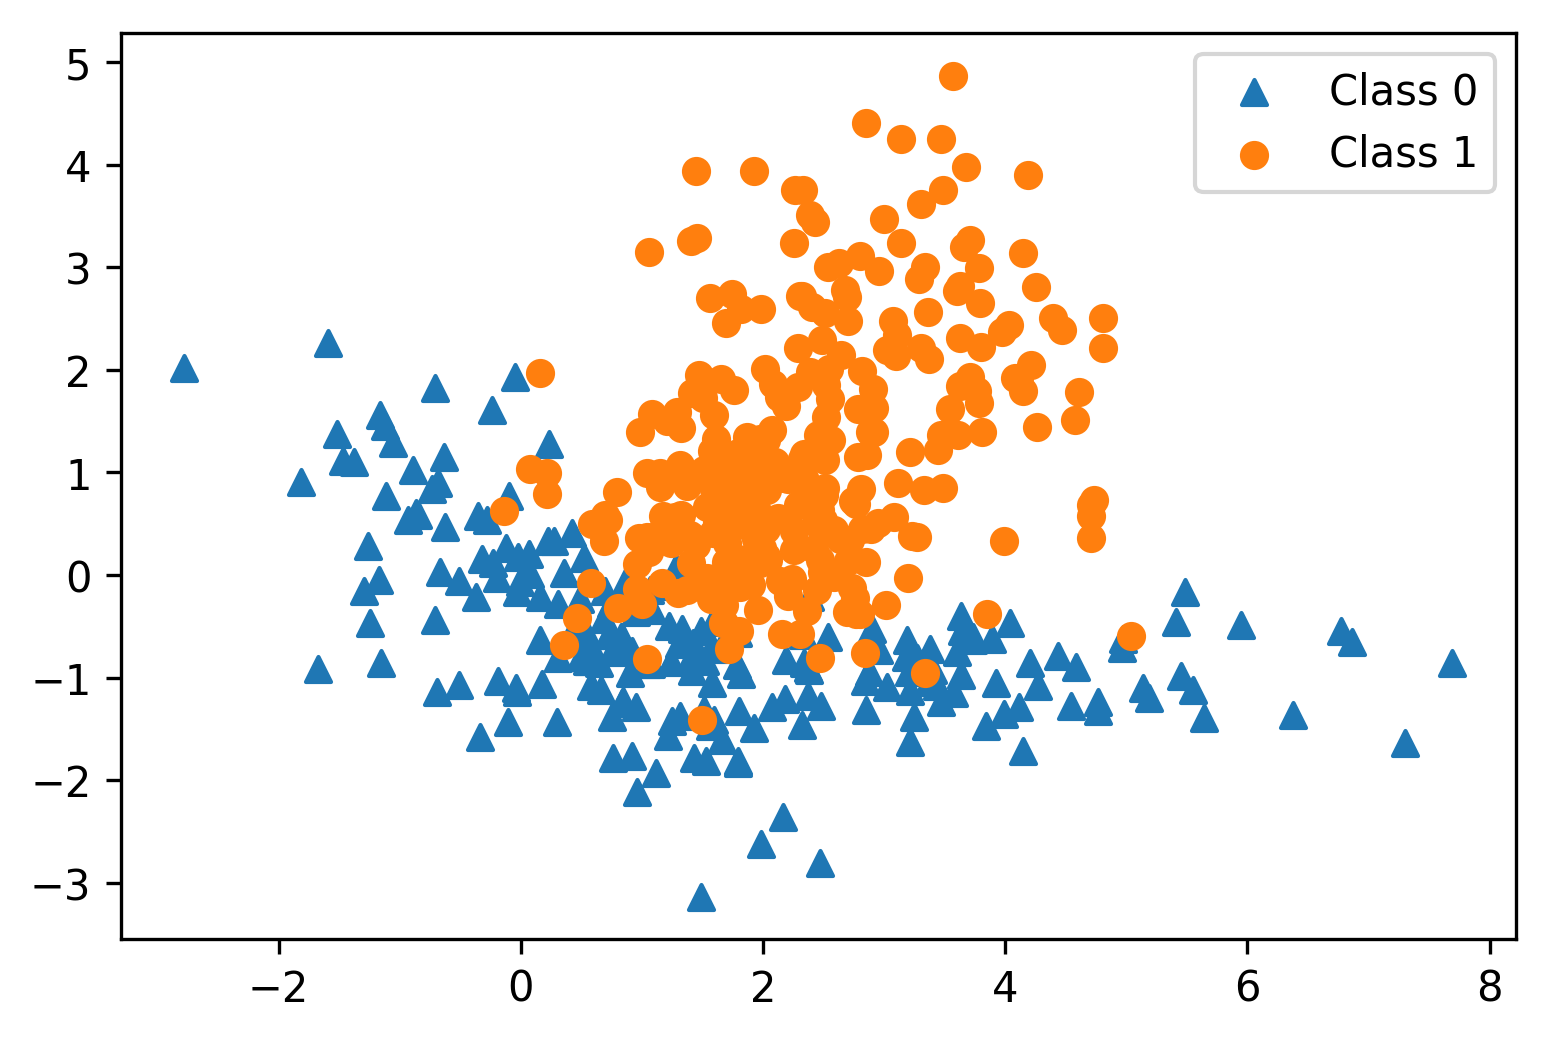

In [96]:
fig = plt.figure(dpi=300)
plt.scatter(C1['X1'], C1['X2'], marker='^', label='Class 0')
plt.scatter(C2['X1'], C2['X2'], marker='o', label='Class 1')
plt.legend()

### Error rate

In [88]:
testing = pandas.read_csv('HW_1_testing.txt', sep='\t')
pred = [[1,0][(c1.pdf(x[1])*p1 > c2.pdf(x[1])*p2) + 0] for x in testing[['X1','X2']].iterrows()]
error_rate = sum([1 for i in range(len(pred)) if pred[i] != testing['Y'][i]]) / len(pred)
print('Error Rate: ' + str(error_rate))

Error Rate: 0.015
